In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = Path('/content/drive/My Drive/python/vkr/TB_Chest_Radiography_Database')

data_dir

PosixPath('/content/drive/My Drive/python/vkr/TB_Chest_Radiography_Database')

In [ ]:
# путь до папок 
normal_cases_dir = data_dir/'Normal'
Tuberculosis_cases_dir = data_dir/'Tuberculosis'

In [ ]:
# glob  ищет по определенному правилу 
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

In [ ]:

train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

train_data.head()

,image,label
0,/content/drive/My Drive/python/vkr/TB_Chest_Ra...,0
1,/content/drive/My Drive/python/vkr/TB_Chest_Ra...,0
2,/content/drive/My Drive/python/vkr/TB_Chest_Ra...,0
3,/content/drive/My Drive/python/vkr/TB_Chest_Ra...,0
4,/content/drive/My Drive/python/vkr/TB_Chest_Ra...,0


0    3534
1     700
Name: label, dtype: int64


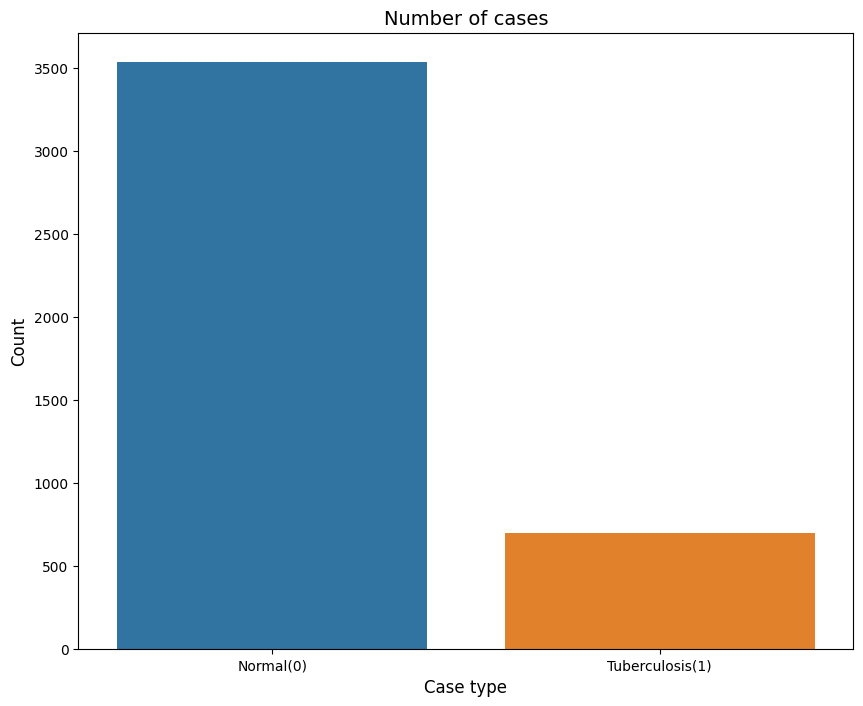

In [ ]:
# Считаем количество картинок для каждого класса 
cases_count = train_data['label'].value_counts()
print(cases_count)

# Визуализируем результаты
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

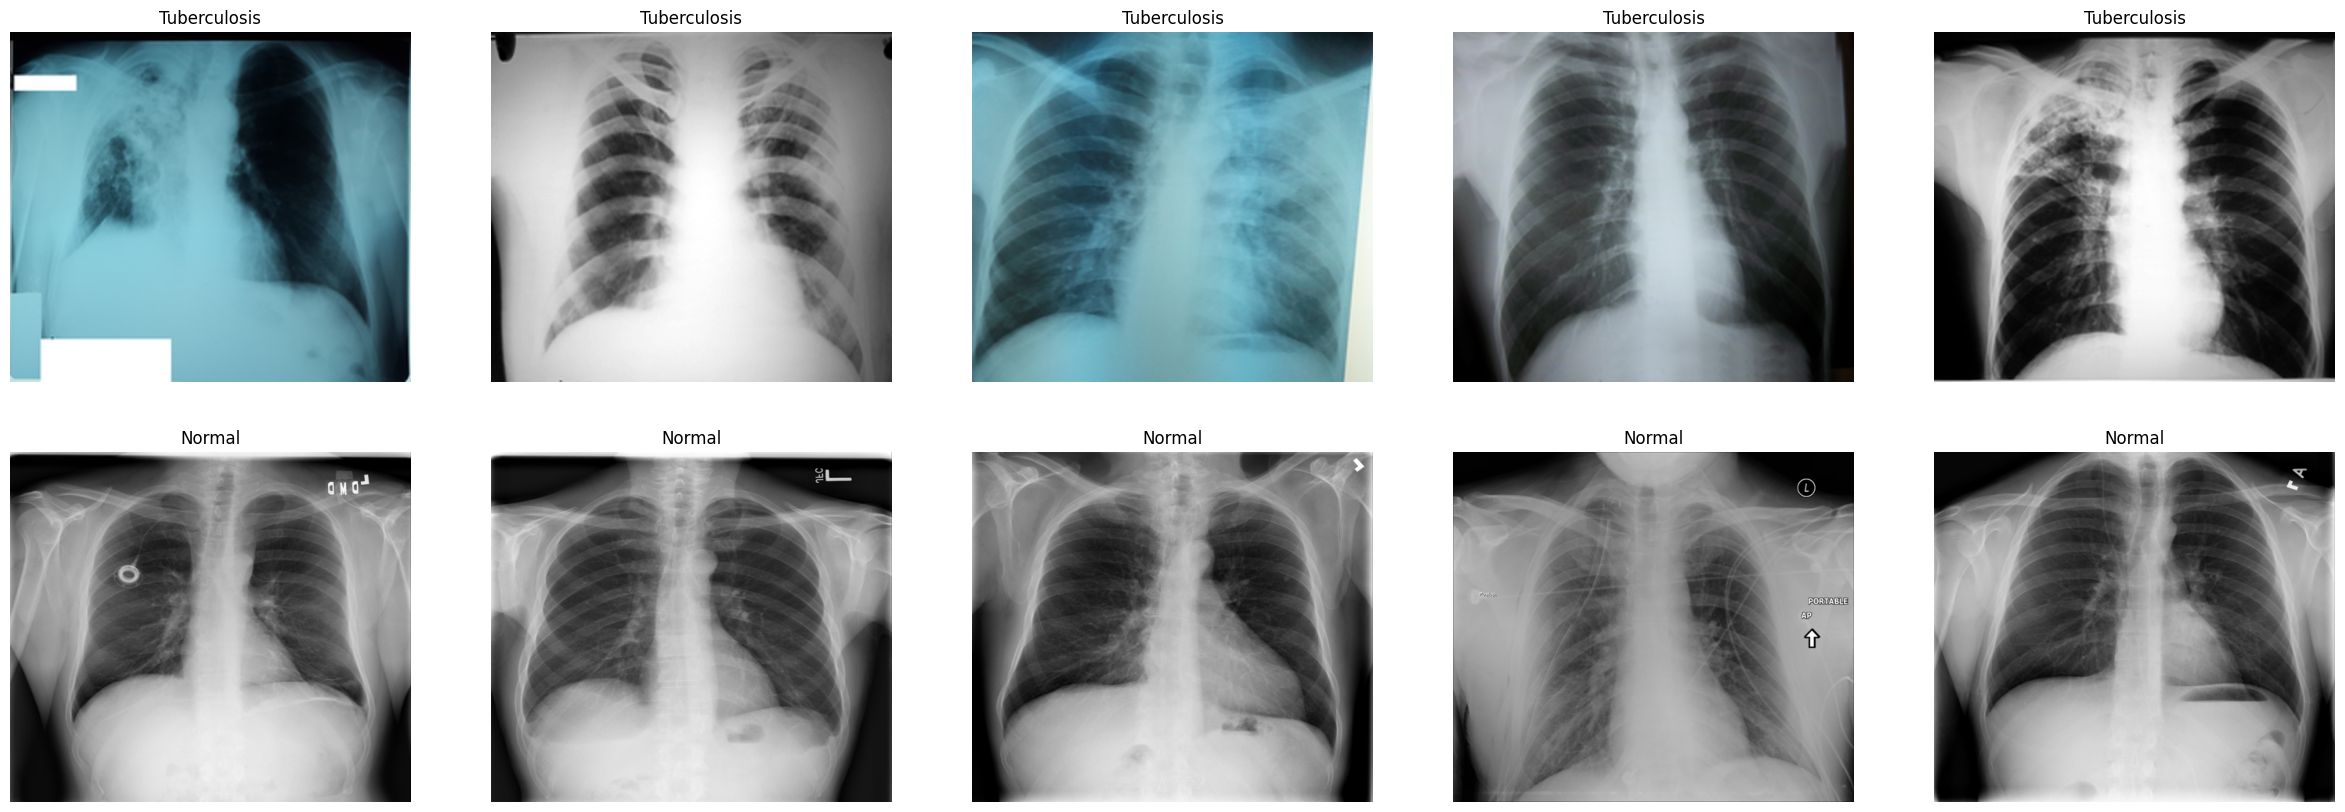

In [ ]:
# Смотрим первые 5 картинок в каждом классе
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Соединяем в единый список 
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Визуализируем
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (56,56))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (56,56))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

3534it [01:27, 40.51it/s]
700it [00:15, 45.64it/s]


Total number of validation examples:  (4234, 56, 56, 3)
Total number of labels: (4234,)


In [ ]:
# размерность 
train_data1.shape



(4234, 56, 56, 3)

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.tail()

,label
4229,Tuberculosis
4230,Tuberculosis
4231,Tuberculosis
4232,Tuberculosis
4233,Tuberculosis


In [ ]:
# перекодируем лейблы в 0 и 1 
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1])

In [ ]:
train_data1.shape,train_labels1.shape

((4234, 56, 56, 3), (4234, 1))

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE() # создается для того , чтобы уничтожить дисбаланс классов и привести их к одному размеру 
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)

In [ ]:


train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

In [ ]:
train_data2.shape,train_labels2.shape

((7068, 9408), (7068, 1))

0    3534
1    3534
Name: label, dtype: int64


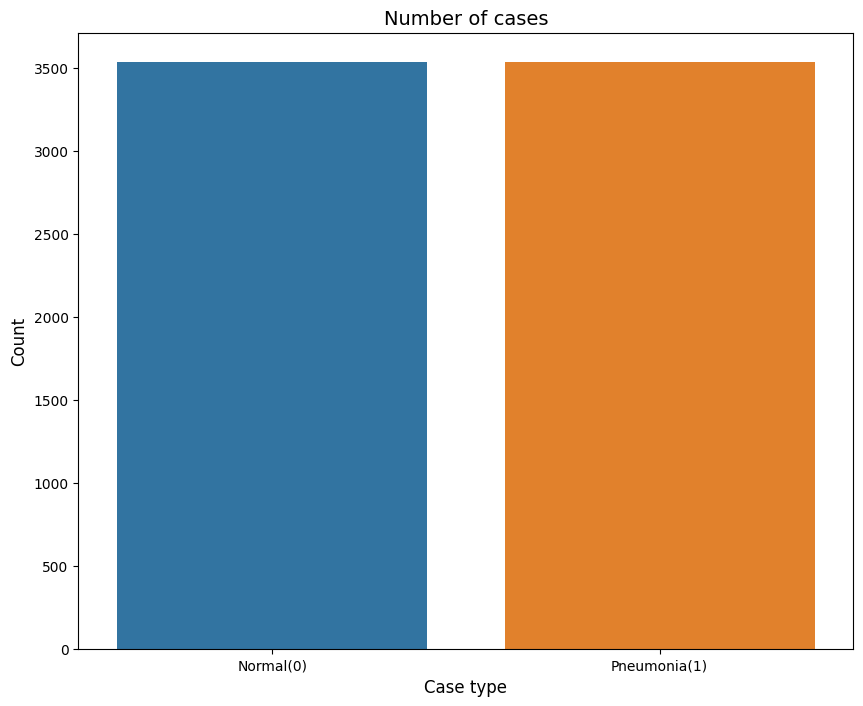

In [ ]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [ ]:
train_data2 =train_data2.reshape(-1,56,56,3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.2, random_state=42)

In [ ]:
import tensorflow 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(56,
                                  56,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(56, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3)) ,
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),

    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 56, 56, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 56)        1568      
                                                                 
 batch_normalization_8 (Batc  (None, 56, 56, 56)       224       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        32320     
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 56, 56, 64)       

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same')) 
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 56, 56, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 56)        1568      
                                                                 
 batch_normalization_8 (Batc  (None, 56, 56, 56)       224       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        32320     
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 56, 56, 64)       

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(np.array(X_train), np.array(y_train), epochs=200, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/200
177/177 [==============================] - 14s 41ms/step - loss: 0.2202 - accuracy: 0.9183 - val_loss: 2.0185 - val_accuracy: 0.4922
Epoch 2/200
177/177 [==============================] - 7s 39ms/step - loss: 0.1203 - accuracy: 0.9583 - val_loss: 1.3682 - val_accuracy: 0.5863
Epoch 3/200
177/177 [==============================] - 7s 39ms/step - loss: 0.0942 - accuracy: 0.9685 - val_loss: 1.6326 - val_accuracy: 0.6089
Epoch 4/200
177/177 [==============================] - 7s 37ms/step - loss: 0.0915 - accuracy: 0.9713 - val_loss: 0.3988 - val_accuracy: 0.8967
Epoch 5/200
177/177 [==============================] - 7s 40ms/step - loss: 0.0716 - accuracy: 0.9770 - val_loss: 0.0905 - val_accuracy: 0.9689
Epoch 6/200
177/177 [==============================] - 7s 39ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.0345 - val_accuracy: 0.9915
Epoch 7/200
177/177 [==============================] - 7s 39ms/step - loss: 0.0570 - accuracy: 0.9820 - val_loss: 0.0227 - val_accuracy

<ipython-input-35-61df31c985ab>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


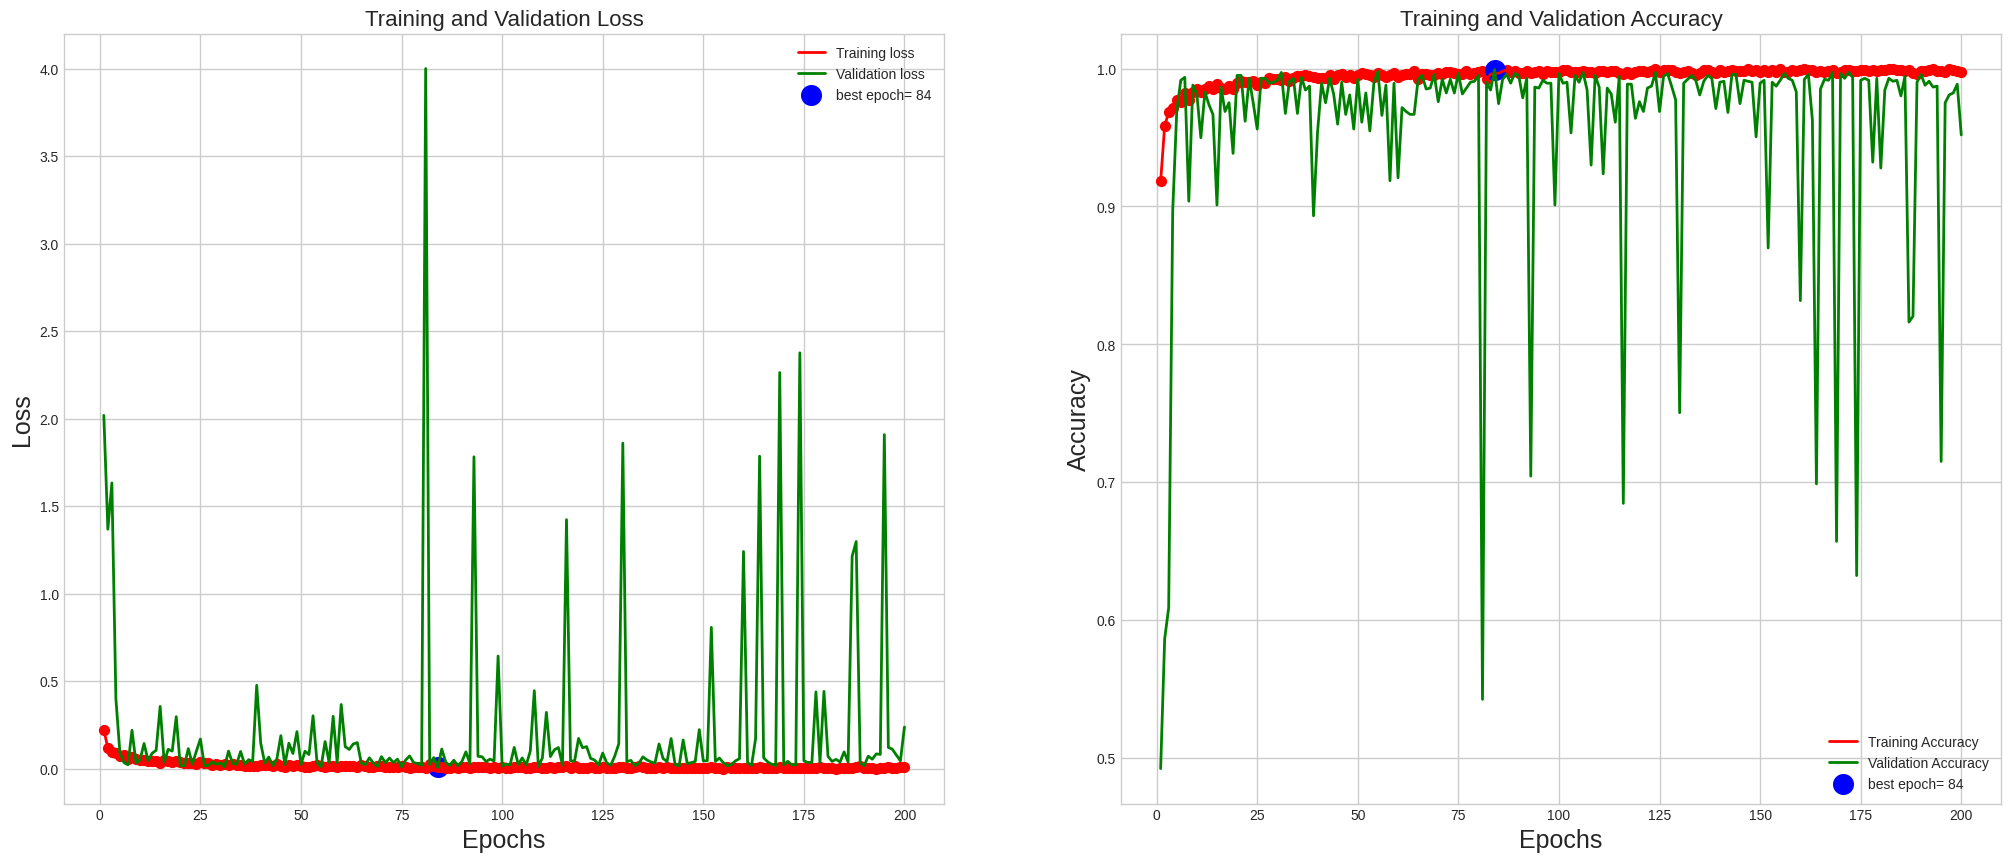

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('seaborn-whitegrid')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=200, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=50, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=50, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=200, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss
    
loss_index=tr_plot(history,0)

In [ ]:
 test_data = []
image='/content/drive/My Drive/python/vkr/TB_Chest_Radiography_Database/tb_1.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [ ]:
a=model.predict(np.array(test_data1))
a

ValueError: ignored

In [ ]:
np.argmax(a)

In [ ]:
model.save('my_model1')

In [ ]:
new_model = tf.keras.models.load_model('./my_model1')

# Check its architecture
new_model.summary()

In [ ]:
a=new_model.predict(np.array(test_data1))
a